In [7]:
# Import other libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

import litstudy

Matplotlib is building the font cache; this may take a moment.


<Axes: title={'center': 'Year of publications'}, xlabel='No. of documents'>

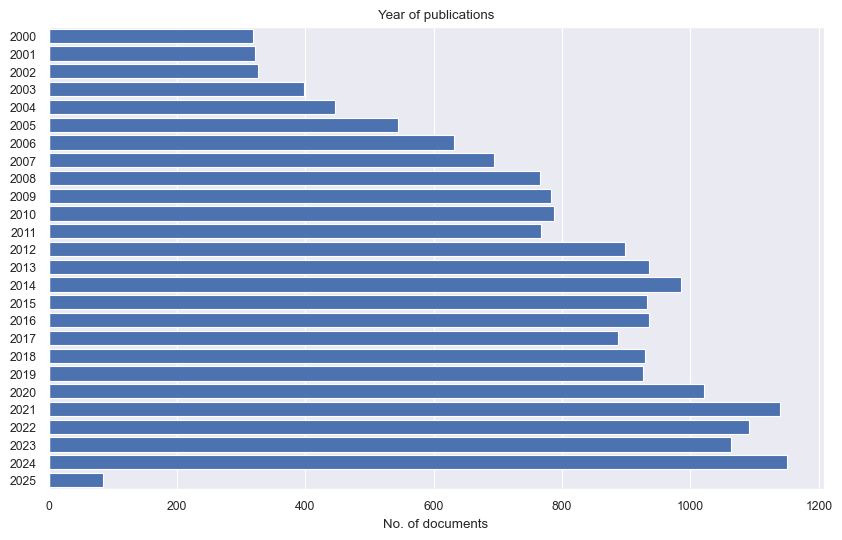

In [27]:
docs_scopus = litstudy.load_scopus_csv("/Users/dpletta/University of Michigan Dropbox/David Pletta/ Data Projects (David Pletta)/Bipolar Lifetime Comorbidities/scopus.csv")

# Plot year histogram
litstudy.plot_year_histogram(docs_scopus)

19767 papers


<Axes: title={'center': 'Authors'}, xlabel='No. of documents'>

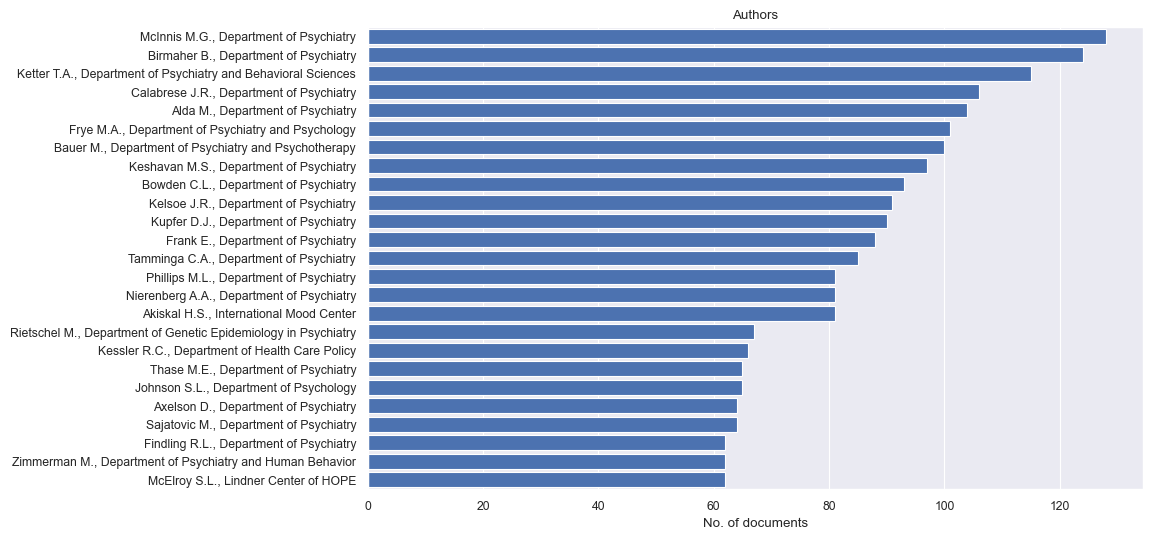

In [53]:
# Filter on publication year.
docs = docs_scopus.filter_docs(lambda d: d. publication_year >= 2000)
print(len(docs) , "papers")

# Plot general statistics and networks.
litstudy.plot_author_histogram(docs)

<Axes: title={'center': 'Affiliations'}, xlabel='No. of documents'>

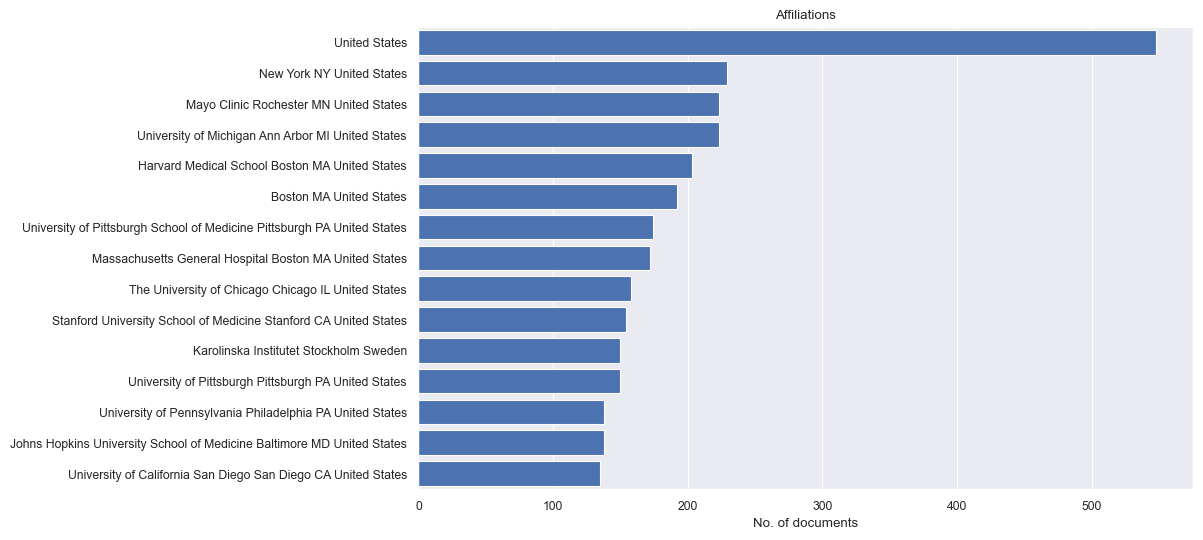

In [19]:
litstudy.plot_affiliation_histogram(docs, limit=15)

<Axes: title={'center': 'Publication source'}, xlabel='No. of documents'>

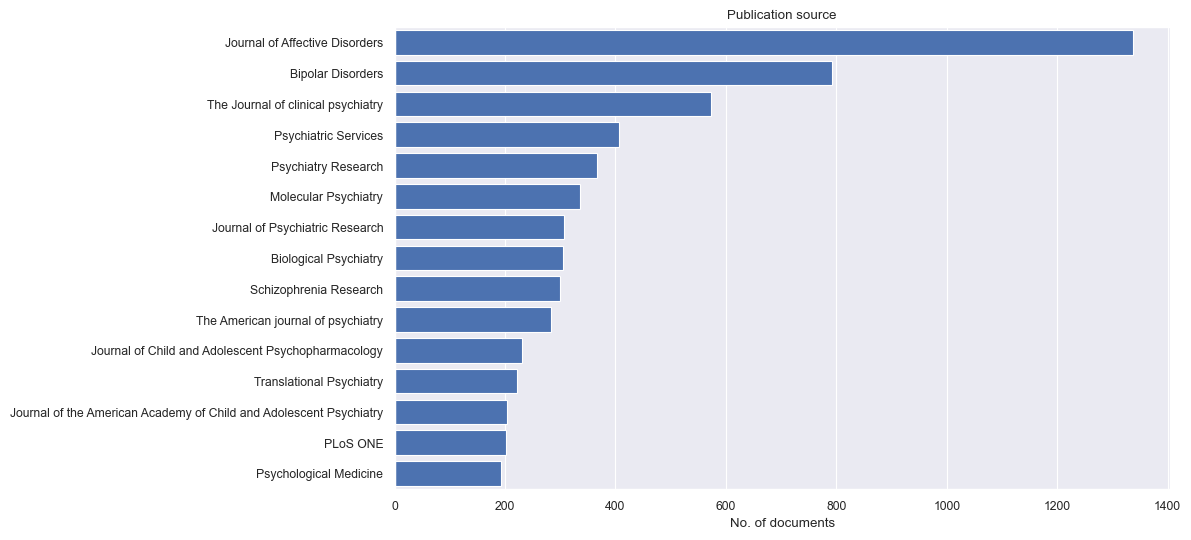

In [29]:
litstudy.plot_source_histogram(docs, limit=15)

<Axes: title={'center': 'Top words'}, ylabel='% of documents'>

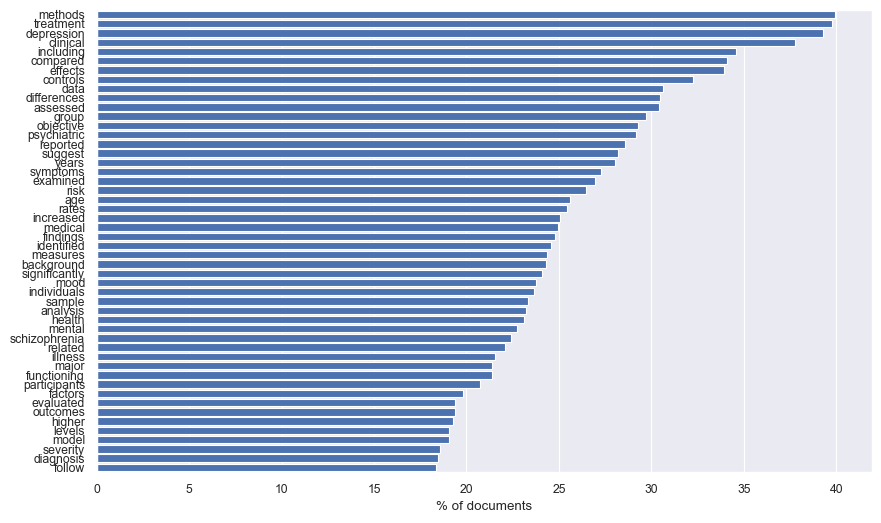

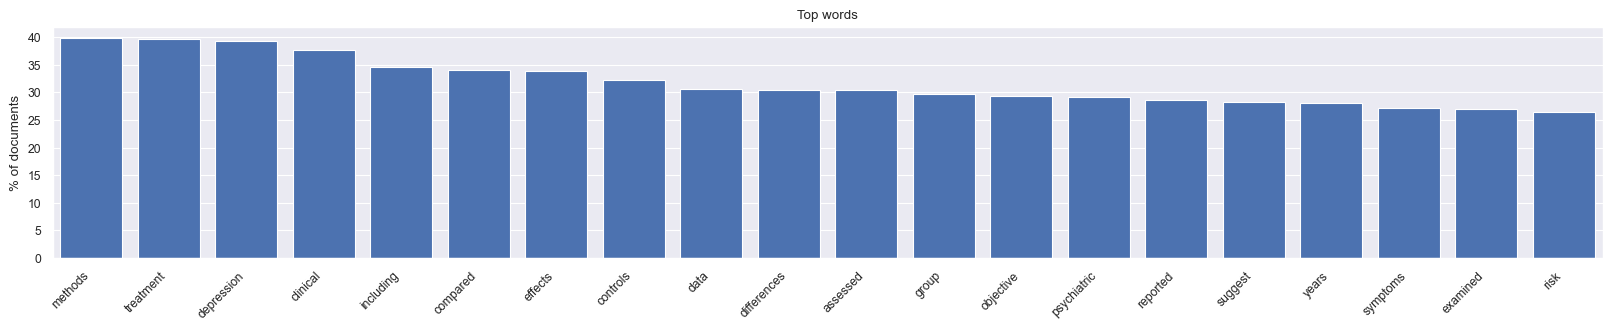

In [33]:
# Build corpus and plot word distributions
corpus = litstudy.build_corpus(docs, ngram_threshold=0.6)
litstudy.plot_word_distribution(corpus , limit=50)

plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, limit=20, title="Top words", vertical=True, label_rotation=45)

In [39]:
# Train topic model and plot topics as word clouds.
num_topics = 15
topic_model = litstudy.train_nmf_model(corpus, num_topics)

In [41]:
#Topic clusters
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['placebo', 'weeks', 'depression', 'mania', 'trial']
Topic 2: ['ect', 'electroconvulsive', 'electroconvulsive_therapy', 'therapy', 'case']
Topic 3: ['lithium', 'levels', 'induced', 'valproate', 'serum']
Topic 4: ['care', 'health', 'primary_care', 'veterans', 'services']
Topic 5: ['mental', 'mental_illness', 'illness', 'mental_health', 'health']
Topic 6: ['opioid', 'pain', 'cancer', 'case', 'drug']
Topic 7: ['suicide', 'attempts', 'suicide_attempts', 'ideation', 'suicidal_ideation']
Topic 8: ['sleep', 'insomnia', 'disturbances', 'circadian', 'sleep_disturbance']
Topic 9: ['adhd', 'children', 'adolescents', 'youth', 'parents']
Topic 10: ['substance', 'women', 'alcohol', 'comorbid', 'abuse']
Topic 11: ['volume', 'brain', 'matter', 'connectivity', 'amygdala']
Topic 12: ['abstract', 'case', 'management', 'year_old', 'issues']
Topic 13: ['cognitive', 'functioning', 'impairment', 'memory', 'social']
Topic 14: ['antipsychotic', 'adherence', 'medical', 'atypical', 'atypical_antipsychot

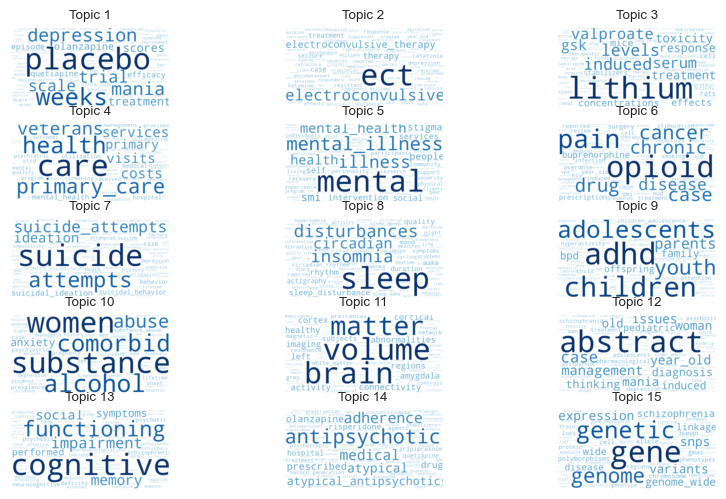

In [43]:
#Word cloud
litstudy.plot_topic_clouds(topic_model)

<Axes: title={'center': 'Year of publications'}, xlabel='No. of documents'>

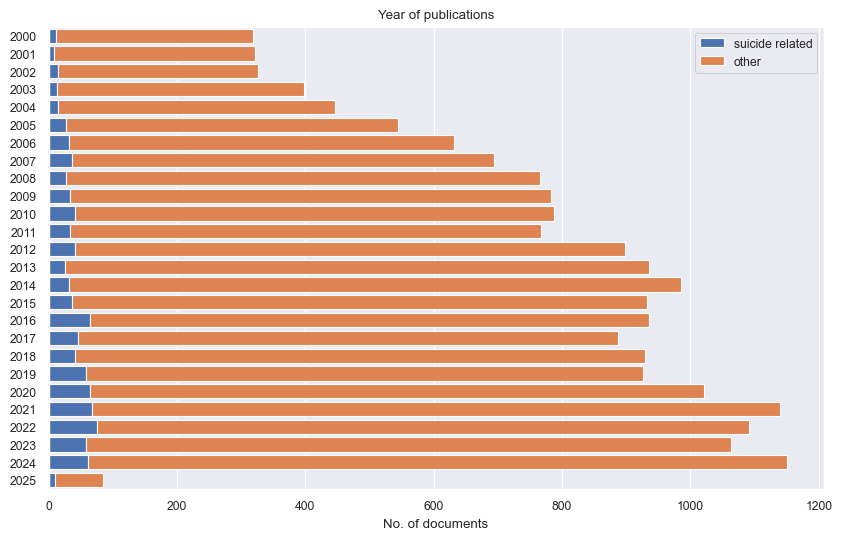

In [57]:
topic_id = topic_model.best_topic_for_token('suicide')

threshold = 0.2
suicide_topic = topic_model.doc2topic[:, topic_id] > threshold

docs = docs.add_property('suicide_topic', suicide_topic)

groups = {
    'suicide related': 'suicide_topic',
    'other': 'not suicide_topic',
}

litstudy.plot_year_histogram(docs, groups=groups, stacked=True)

In [63]:
# Plot citation network
litstudy.network.plot_coauthor_network(docs, max_authors=20)

citation.html


In [77]:
pip install pandoc

  Preparing metadata (setup.py) ... done
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34792 sha256=87732ec46217c968a54ce0e05792212f66cfc25efe0e0d91ac02098c17bd3a69
  Stored in directory: /Users/dpletta/Library/Caches/pip/wheels/9c/2f/9f/b1aac8c3e74b4ee327dc8c6eac5128996f9eadf586e2c0ba67
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.
